<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_assignment2.5/blob/main/assignment2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Write a neural network that can:
--> take 2 inputs:
###1) an image from the MNIST dataset (say 5), and
###2) a random number between 0 and 9, (say 7)
and gives two outputs:
the "number" that was represented by the MNIST image (predict 5), and
the "sum" of this number with the random number and the input image to the network (predict 5 + 7 = 12)
                 
you can mix fully connected layers and convolution layers
you can use one-hot encoding to represent the random number input and the "summed" output.
Random number (7) can be represented as 0 0 0 0 0 0 0 1 0 0
Sum (13) can be represented as:
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
0b1101 (remember that 4 digits in binary can at max represent 15, so we may need to go for 5 digits. i.e. 10010

#Importing packages

In [1]:
import numpy as np
import torch 
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import grad
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import pandas as pd

# PyTorch Main

# Working with the dataset

###For better understanding network first we study about dataset.

### A common nn pipeline looks like this:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model

In [2]:
# now let's work with Mnist first loading the MNIST dataset
#The MNIST (Modified National Institute of Standards and Technology) dataset is a widely used dataset for the machine learning community. It consists of a training set of 60,000 labeled images and a test set of 10,000 images. The images are of handwritten digits, and the goal of a machine learning model trained on this data is to accurately classify the digits in the images. The images are 28x28 pixels and are grayscale, with a single pixel value ranging from 0 (white) to 255 (black). The digits are pre-processed and centered in the images. The MNIST dataset is often used as a benchmark for machine learning models, particularly for image classification tasks.

train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
train_loader = torch.utils.data.DataLoader(train_set #loading the data with a batch size of 32
    ,batch_size=32
    ,shuffle=True
)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [5]:
sample = next(iter(train_set))

len(sample)

2

In [6]:
image, label = sample

label: 5


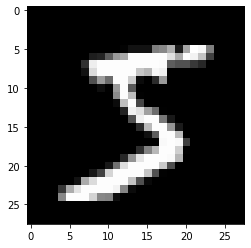

In [7]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [8]:
batch = next(iter(train_loader))

len(batch), type(batch)

(2, list)

In [9]:
images, labels = batch

In [10]:
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([9, 0, 3, 1, 3, 3, 1, 4, 5, 6, 7, 3, 8, 1, 0, 4, 8, 7, 2, 2, 8, 0, 1, 7, 1, 4, 6, 5, 1, 0, 4, 0])


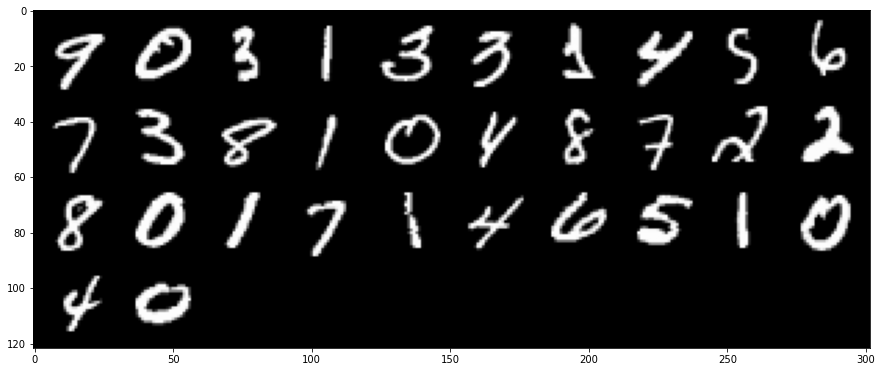

In [11]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

###In above Figure we observed all digits from 0 to 9


In [12]:
from torch.utils.data import Dataset

class Mnist( ):
  def __init__(self, label1 ,random_number):
    #self.data = pd.read_csv(csv_file)
    self.label1=label1
    self.random_number=random_number

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label, image = r
    return label, image
  def __getlabel__(self,label1,random_number):
     label2= label1 + random_number
     return self.label1,label2

  def __len__(self):
    return len(self.data)

In [13]:
len(train_set)

60000

In [14]:
#generating a random number with a torch and converting to float32
random_number=torch.randint(0,9,(1,))
random_number=random_number.to(torch.float32)
random_number.dtype

torch.float32

In [15]:
Mnist_data=Mnist(train_set.train_labels[0],random_number)

Mnist_data.__getlabel__(train_set.train_labels[0],random_number)

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(tensor(5), tensor([5.]))

In [16]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t


In [17]:
label1=train_set.train_labels #label1 is mnist label 
label2=random_number+label1 # label2 is summed value of Mnist label and random number

# Network

In [18]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
# class Network(nn.Module):
#   def __init__(self):
#     super().__init__()

#     # input 28 # output 24 # receptive_field = 5
#     self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
#     # input 24 # output 20 # receptive_field = 9
#     self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#     # input 12x20x20, output 120
#     # input 10*512
#     self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
#     self.fc2 = nn.Linear(in_features=120, out_features=60)
#     self.out = nn.Linear(in_features=60, out_features=10)
  
#   def forward(self, t):
#     return t


In [19]:
network = Network()

print(network)

Network()


In [ ]:
# class Network(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
#     self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#     self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
#     self.fc2 = nn.Linear(in_features=120, out_features=60)
#     self.out = nn.Linear(in_features=60, out_features=10)
  
#   def forward(self, t):
#     # TODO implement this
#     return t

# network = Network()

# for name, param in network.named_parameters():
#   print(name, '\t\t', param.shape)

In [ ]:
# x1 = torch.randn([10,400])
# x2=torch.randn([10,20])
# print(x1.shape)
# print(torch.cat((x1, x2), 1).shape)

torch.Size([10, 400])
torch.Size([10, 420])


In [42]:
class Network(nn.Module):
  def __init__(self,rn_input=3,):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3) #input=28 output=26 RF=3
    self.conv2 = nn.Conv2d(in_channels=8, out_channels= 16, kernel_size=3) 
    self.fc_rn = nn.Linear(in_features=10, out_features=20)
    #self.fc1 = nn.Linear(in_features=400, out_features=)
    self.fc1 = nn.Linear(in_features=420, out_features=100)
    self.fc2 = nn.Linear(in_features=100, out_features=29)
    self.out1 = nn.Linear(in_features=29,out_features=10)
    self.out2 = nn.Linear(in_features=29,out_features=19)
  
  def forward(self, t1,t2):
    # input layer
    x = t1

    # conv1 layer
    x = self.conv1(x) # 28 | 26 | 3
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 26 | 13 | 6

    # conv2 layer
    x = self.conv2(x) #13 | 11 | 8
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 11 | 5 | 16 >> 16x5x5

    # reshape
    x = x.reshape(-1, 400) #400
    #x=x.unsqueeze(0)
    x_rn = t2
    print(x.shape)
    # fc_rn layer
    x_rn = self.fc_rn(x_rn)
    x_rn = F.relu(x_rn)
    #x_rn=x_rn.unsqueeze(0)
    print(x_rn.shape)
    #concatenate
    concat_data=torch.cat((x,x_rn),1) #combined data 420
    print(concat_data.shape)
    # fc1 layer
    x = self.fc1(concat_data) 
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x) 
    x = F.relu(x)

    # output mnist layer
    x_mnist = self.out1(x)
    out_mnist= F.softmax(x_mnist, dim=0)
    
    #out_sum=x[10:]
    #output sum value
    x_sum=self.out2(x)
    out_sum = F.softmax(x_sum, dim=0)
    return out_mnist,out_sum

In [23]:
len(next(iter(train_loader)))

2

In [24]:
random_number=torch.randint(0,9,(1,))

In [25]:
random_number=torch.randint(0,9,(1,))
random_number=random_number.to(torch.float32)
random_number.dtype

torch.float32

In [27]:
# random_number=F.one_hot(random_number,num_classes=10)
# random_number.dtype

In [28]:
# random_number=random_number.to(torch.float32)
# random_number.dtype

In [29]:
label1

tensor([5, 0, 4,  ..., 5, 6, 8])

In [30]:
images, labels = batch
images.dtype

torch.float32

In [43]:
network = Network()
batch_size=2
train_loader = torch.utils.data.DataLoader(train_set, batch_size=2)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, label1 = batch
random_number=torch.randint(0,9,(batch_size,))
label2 = random_number + label1
random_number=F.one_hot(random_number,num_classes=10)
random_number=random_number.squeeze().to(torch.float32)
label1=F.one_hot(label1,num_classes=10)
label1=label1.squeeze().to(torch.float32)
label2=F.one_hot(label2,num_classes=19)
label2=label2.squeeze().to(torch.float32)

print(random_number.shape)
#random_number= F.one_hot(random_number,num_classes=10)
preds1,preds2 = network(images,random_number) 
# Pass Batch
print(preds1.shape,preds2.shape)
print(label1.shape,label2.shape)
# labels=F.one_hot(labels,num_classes=10)
# labels=labels.squeeze()
# labels=labels.to(torch.float32)
# print(preds1.dtype)
# print(labels.dtype)
loss1 = F.cross_entropy(preds1, label1) # Calculate Loss

loss1.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss1.item())
# labels2=labels+ 1
# labels2=F.one_hot(labels2,num_classes=10)
# labels=labels.squeeze()
# labels=labels.to(torch.float32)
# preds1,preds2 = network(images)
# print(preds1,preds2)
# loss1= F.cross_entropy(preds1, label1)
# loss2= F.cross_entropy(preds2, label2)
# print('loss2:', loss.item())
loss2 = F.cross_entropy(preds2, label2) # Calculate Loss


print('loss2:', loss2.item())

torch.Size([2, 10])
torch.Size([2, 400])
torch.Size([2, 20])
torch.Size([2, 420])
torch.Size([2, 10]) torch.Size([2, 19])
torch.Size([2, 10]) torch.Size([2, 19])
loss1: 2.302769184112549
loss2: 2.9448301792144775


In [44]:
torch.set_grad_enabled(True)

In [47]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item()

In [48]:
network = Network()
batch_size=100
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)


for epoch in range(10):
  total_loss1 = 0
  total_correct1 = 0
  total_loss2 = 0
  total_correct2 = 0
  for batch in train_loader: # Get Batch
      images, label1 = batch
      random_number=torch.randint(0,9,(batch_size,))
      label2 = random_number + label1
      random_number=F.one_hot(random_number,num_classes=10)
      random_number=random_number.squeeze().to(torch.float32)
      label1=F.one_hot(label1,num_classes=10)
      label1=label1.squeeze().to(torch.float32)
      label2=F.one_hot(label2,num_classes=19)
      label2=label2.squeeze().to(torch.float32)
      #print(label2.shape)
      optimizer.zero_grad()
      #random_number= F.one_hot(random_number,num_classes=10)
      preds1,preds2 = network(images,random_number) 
      # Pass Batch
      #print(preds1,preds2)
      # labels=F.one_hot(labels,num_classes=10)
      # labels=labels.squeeze()
      # labels=labels.to(torch.float32)
      # print(preds1.dtype)
      # print(labels.dtype)
      loss1 = F.cross_entropy(preds1, label1) # Calculate Loss
      #print(preds2.shape)
      loss1.backward() # Calculate Gradients
      optimizer.step()
       # Update Weights
      
      print('loss1:', loss1.item())
      # labels2=labels+ 1
      # labels2=F.one_hot(labels2,num_classes=10)
      # labels=labels.squeeze()
      # labels=labels.to(torch.float32)
      # preds1,preds2 = network(images)
      # print(preds1,preds2)
      # loss1= F.cross_entropy(preds1, label1)
      # loss2= F.cross_entropy(preds2, label2)
      # print('loss2:', loss.item())
      #loss2 = F.cross_entropy(preds2, label2)
      #loss2.backward() # Calculate Gradients
      optimizer.step() # Calculate Loss
      total_loss1 += loss1.item()
      total_correct1 += get_num_correct(preds1, label1)
      total_loss2 += loss2.item()
      total_correct2 += get_num_correct(preds2, label2)

      print('loss2:', loss2.item())
      print(
      "epoch:", epoch, 
      "total_correct1:", total_correct1, 
      "loss1:", total_loss1,
      "total_correct2:", total_correct2, 
      "loss2:", total_loss2
  )

Streaming output truncated to the last 5000 lines.
loss2: 2.9444403648376465
epoch: 8 total_correct1: 3372 loss1: 846.4268019199371 total_correct2: 481 loss2: 1080.6096138954163
torch.Size([100, 400])
torch.Size([100, 20])
torch.Size([100, 420])
loss1: 2.2958974838256836
loss2: 2.9444403648376465
epoch: 8 total_correct1: 3383 loss1: 848.7226994037628 total_correct2: 481 loss2: 1083.554054260254
torch.Size([100, 400])
torch.Size([100, 20])
torch.Size([100, 420])
loss1: 2.2958977222442627
loss2: 2.9444403648376465
epoch: 8 total_correct1: 3394 loss1: 851.0185971260071 total_correct2: 483 loss2: 1086.4984946250916
torch.Size([100, 400])
torch.Size([100, 20])
torch.Size([100, 420])
loss1: 2.3058977127075195
loss2: 2.9444403648376465
epoch: 8 total_correct1: 3401 loss1: 853.3244948387146 total_correct2: 483 loss2: 1089.4429349899292
torch.Size([100, 400])
torch.Size([100, 20])
torch.Size([100, 420])
loss1: 2.3070249557495117
loss2: 2.9444403648376465
epoch: 8 total_correct1: 3409 loss1: 855

In [49]:
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
# optimizer = optim.Adam(network.parameters(), lr=0.01)

# for epoch in range(10):

#     total_loss = 0
#     total_correct = 0

#     for batch in train_loader: # Get Batch
#         images, labels = batch 

#         preds = network(images) # Pass Batch
#         loss = F.cross_entropy(preds, labels) # Calculate Loss

#         optimizer.zero_grad()
#         loss.backward() # Calculate Gradients
#         optimizer.step() # Update Weights

#         total_loss += loss.item()
#         total_correct += get_num_correct(preds, labels)

#     print(
#         "epoch", epoch, 
#         "total_correct:", total_correct, 
#         "loss:", total_loss
#     )